# Final Project - file analyse

#### On récupère l'ensemble des charactères dans le fichier pickle donné. Ensuite, on va essayer de créer un graphe qui relie l'ensemble des charactères entre  eux

### Import database

In [1]:
import spacy
import re
import en_core_web_sm
import en_core_web_lg
import math
import token
import string
#import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter



#import pandas as pd
#import numpy as np
#import base64

In [2]:
nlp_sm = en_core_web_sm.load()
nlp_sm.max_length = 2500000

nlp_lg = en_core_web_lg.load()
nlp_lg.max_length = 2500000

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punctuations = string.punctuation

ADJ	adjective	new, good, high, special, big, local

ADP	adposition	on, of, at, with, by, into, under

ADV	adverb	really, already, still, early, now

CONJ	conjunction	and, or, but, if, while, although

DET	determiner, article	the, a, some, most, every, no, which

NOUN	noun	year, home, costs, time, Africa

NUM	numeral	twenty-four, fourth, 1991, 14:24

PRT	particle	at, on, out, over per, that, up, with

PRON

In [3]:
with open('Files/test.txt') as fp:
    text = fp.read()

In [4]:
text

'What a Waste 2.0\n\n\n\nA Global Snapshot of Solid Waste Management to 2050 \n\n\n\nThe Urban Development Series discusses the challenge of urbanization and \nwhat it will mean for developing countries in the decades ahead. The series \naims to delve substantively into a range of core issues related to urban development \nthat policy makers and practitioners must address. \nCities and Climate Change: Responding to an Urgent Agenda \nClimate Change, Disaster Risk, and the Urban Poor: Cities Building \nResilience for a Changing World \nEast Asia and Pacific Cities: Expanding Opportunities for the Urban Poor \nEast Asia’s Changing Urban Landscape: Measuring a Decade of Spatial \nGrowth \nThe Economics of Uniqueness: Investing in Historic City Cores and \nCultural Heritage Assets for Sustainable Development \nFinancing Transit-Oriented Development with Land Values: Adapting \nLand Value Capture in Developing Countries \nRegenerating Urban Land: A Practitioner’s Guide to Leveraging Private

### Clean the text

In [5]:
# -*- coding: utf-8 -*-
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n\n\n\n\n","<stop>")
    text = text.replace("\n\n\n\n","<stop>")
    text = text.replace("\n\n\n","<stop>")
    text = text.replace("\n\n","<stop>")
    text = text.replace("\n"," ")
    #text = re.sub(prefixes,"\\1<prd>",text)
    #text = re.sub(websites,"<prd>\\1",text)
    #if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    #text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    #text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    #text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    #text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    #text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    #text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    #text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    #if "”" in text: text = text.replace(".”","”.")
    #if "\"" in text: text = text.replace(".\"","\".")
    #if "!" in text: text = text.replace("!\"","\"!")
    #if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(". ",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    #text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [6]:
# -*- coding: utf-8 -*-
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n\n\n\n\n\n","<stop>")
    text = text.replace("\n\n\n\n\n","<stop>")
    text = text.replace("\n\n\n\n","<stop>")
    text = text.replace("\n\n\n","<stop>")
    text = text.replace("\n\n","<stop>")
    text = text.replace("\n"," ")
    text = text.replace(". ",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [9]:
sentences = split_into_sentences(text)

In [10]:
sentences

['What a Waste 2.0',
 'A Global Snapshot of Solid Waste Management to 2050',
 'The Urban Development Series discusses the challenge of urbanization and  what it will mean for developing countries in the decades ahead.',
 'The series  aims to delve substantively into a range of core issues related to urban development  that policy makers and practitioners must address.',
 'Cities and Climate Change: Responding to an Urgent Agenda  Climate Change, Disaster Risk, and the Urban Poor: Cities Building  Resilience for a Changing World  East Asia and Pacific Cities: Expanding Opportunities for the Urban Poor  East Asia’s Changing Urban Landscape: Measuring a Decade of Spatial  Growth  The Economics of Uniqueness: Investing in Historic City Cores and  Cultural Heritage Assets for Sustainable Development  Financing Transit-Oriented Development with Land Values: Adapting  Land Value Capture in Developing Countries  Regenerating Urban Land: A Practitioner’s Guide to Leveraging Private  Investment 

In [ ]:
def cleanup_text_sm(doc):
    for i in doc:
        sentence = nlp_sm(i)
        tokens = [tok.lemma_.lower().strip() for tok in sentence]# if tok.lemma_ != '-PRON-']
        #tokens = [tok for tok in tokens if tok not in nltk.ADV]
        tokens = [tok for tok in tokens if tok not in stopwords] 
        tokens = [tok for tok in tokens if tok not in punctuations]
        tokens = [tok for tok in tokens if tok != 'et']
        tokens = [tok for tok in tokens if tok != 'al']
        tokens = ' '.join(tokens)
        words_list = [word.strip(string.punctuation) for word in tokens.split()]
        counts = Counter(words_list)
    return counts
text_sm = cleanup_text_sm(text)

In [12]:
text_sm

Counter({'w': 1})

In [18]:
def cleanup_text_sm(doc):
    for i in doc:
        sentence = nlp_sm(i)
        tokens = [tok.lemma_.lower().strip() for tok in sentence]# if tok.lemma_ != '-PRON-']
        #tokens = [tok for tok in tokens if tok not in nltk.ADV]
        tokens = [tok for tok in tokens if tok not in stopwords] 
        tokens = [tok for tok in tokens if tok not in punctuations]
        tokens = [tok for tok in tokens if tok != 'et']
        tokens = [tok for tok in tokens if tok != 'al']
        tokens = ' '.join(tokens)
        words_list = [word.strip(string.punctuation) for word in tokens.split()]
        counts = Counter(words_list)
        return counts
text_sm = cleanup_text_sm(text)

In [19]:
cleanup_text_sm(p)

Counter({'waste': 1, '2.0': 1})

In [6]:
def cleanup_text_lg(doc):
    doc = nlp_lg(doc)
    tokens = [tok.lemma_.lower().strip() for tok in doc] #if tok.lemma_ != '-PRON-']
    #tokens = [tok for tok in tokens if tok not in nltk.ADV]
    tokens = [tok for tok in tokens if tok not in stopwords] 
    tokens = [tok for tok in tokens if tok not in punctuations]
    tokens = [tok for tok in tokens if tok != 'et']
    tokens = [tok for tok in tokens if tok != 'al']
    tokens = ' '.join(tokens)
    words_list = [word.strip(string.punctuation) for word in tokens.split()]
    counts = Counter(words_list)
    return counts

In [8]:
text_lg = cleanup_text_lg(text)

In [9]:
text_lg

Counter({'anaerobic': 100,
         'digestion': 116,
         'stabilization': 33,
         'organic': 119,
         'fraction': 56,
         'municipal': 22,
         'waste': 163,
         '1': 16,
         'introduction': 3,
         'past': 3,
         'decade': 8,
         'many': 10,
         'develop': 36,
         'country': 19,
         'world': 7,
         'experience': 2,
         'sharp': 2,
         'increase': 109,
         'population': 10,
         'uncontrolled': 7,
         'growth': 40,
         'couple': 7,
         'rapid': 17,
         'urbanization': 4,
         'gradual': 12,
         'rise': 2,
         'per': 27,
         'capita': 5,
         'income': 1,
         'lead': 33,
         'unprecedented': 2,
         'annual': 2,
         'generation': 45,
         'solid': 70,
         'msw': 75,
         'necessarily': 3,
         'comprise': 10,
         'market': 10,
         'refuse': 2,
         'food': 7,
         'fw': 34,
         'kitchen': 5,
        

### Plot the data

In [6]:
def plot_data(doc):
    words = [word[0] for word in doc.most_common(20)]
    counts = [word[1] for word in doc.most_common(20)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=words, y=counts)
    plt.title('Most Common Words used in the text')
    return plt.show()

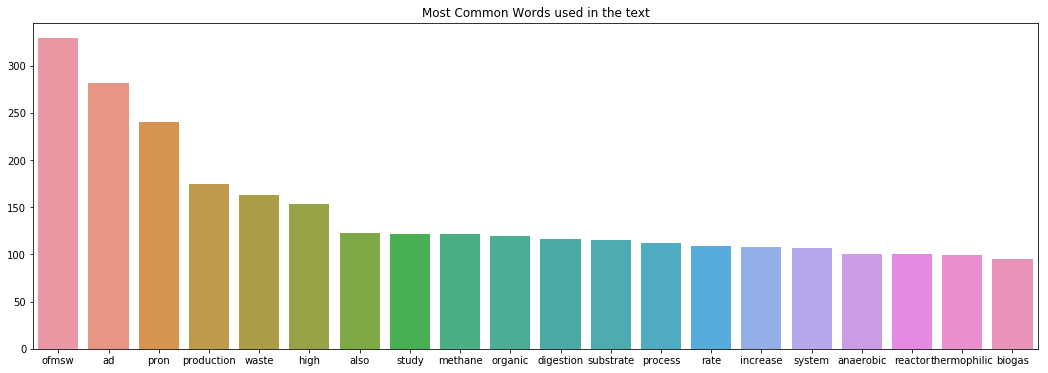

In [6]:
plot_data(text_sm)

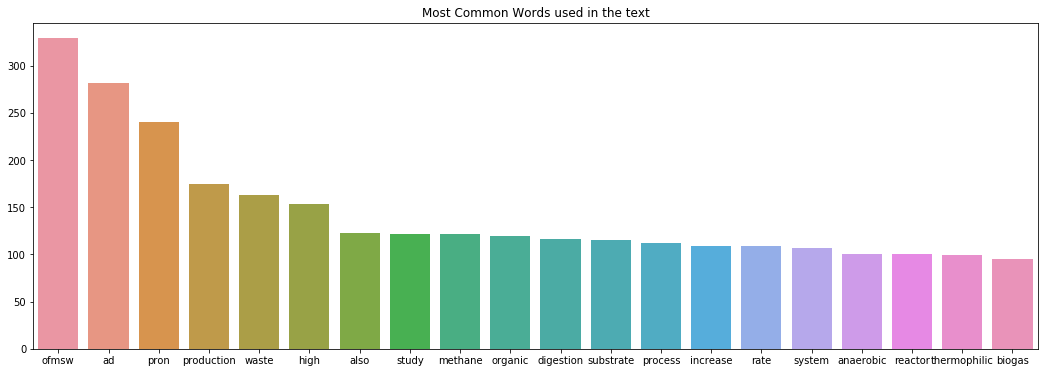

In [7]:
plot_data(text_lg)

In [3]:
def union_entities(listA, listB):
    result = listA
    for ent_b,y1,y2 in listB:
        overlap = False
        for ent_a,x1,x2 in listA:
            if x1 <= y2 and y1 <= x2: # overlap
                overlap = True
                if (y2-y1) > (x2-x2): # the largest entity is B
                    result.remove((ent_a,x1,x2))
                    result.append((ent_b,y1,y2))
                break
        if not overlap:
            result.append((ent_b,y1,y2))
    return result

In [4]:
with open('Files/Anaerobic digestion for the stabilization of the organic fraction of municipal waste.txt') as fp:
    text = fp.read()
    chapters = text.split('\n\n\n\n\n')
    for i in range(0,len(chapters)):
        name =[word for word in chapters[i].split('\n') if len(word.strip())>0][0]
        print(i+1,name.title())
        chapter = ' '.join([word.replace('\t','').replace('"','') for word in chapters[i].split('\n') if len(word.strip())>0][1:])
        
        doc1 = nlp_sm(text)
        doc2 = nlp_lg(text)
        sm = []
        lg = []
        for ent in doc1.ents:
            if ent.label_ == 'PERSON':
                sm.append((ent.text, ent.start_char, ent.end_char))
        for ent in doc2.ents:
            if ent.label_ == 'PERSON':
                lg.append((ent.text, ent.start_char, ent.end_char))
        
        entities = union_entities(sm,lg)  
        print(len(entities))

1 Anaerobic Digestion For The Stabilization Of The Organic Fraction Of Municipal Waste
513
2 1. Introduction
513
3 2. Origin Of Ad Of Ofmsw
513
4 3. Innovative Developments On Ad Of Ofmsw
513
5 4. Role Of Various Factors Influencing Ad Of Ofmsw
513
6 5. Potential Of Ad Of Ofmsw 
513
7 6. Critical Issues In Ad Of Ofmsw 
513


In [11]:
with open('Files/Anaerobic digestion for the stabilization of the organic fraction of municipal waste.txt') as fp:
    text = fp.read()
    
punctuations = string.punctuation
def cleanup_text(text, logging=False):
    texts = []
    counter = 1
    for doc in texts:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(texts)))
        counter += 1
        doc = nlp(text, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(docs)
INFO_text = [doc for doc in train[train['Conference'] == 'INFOCOM']['Title']]
IS_text = [text for text in train[train['Conference'] == 'ISCAS']['Title']]
INFO_clean = cleanup_text(INFO_text)
INFO_clean = ' '.join(INFO_clean).split()
IS_clean = cleanup_text(IS_text)
IS_clean = ' '.join(IS_clean).split()
INFO_counts = Counter(INFO_clean)
IS_counts = Counter(IS_clean)
INFO_common_words = [word[0] for word in INFO_counts.most_common(20)]
INFO_common_counts = [word[1] for word in INFO_counts.most_common(20)]
fig = plt.figure(figsize=(18,6))
sns.barplot(x=INFO_common_words, y=INFO_common_counts)
plt.title('Most Common Words used in the research papers for conference INFOCOM')
plt.show()

1 Anaerobic Digestion For The Stabilization Of The Organic Fraction Of Municipal Waste
2 1. Introduction
3 2. Origin Of Ad Of Ofmsw
4 3. Innovative Developments On Ad Of Ofmsw
5 4. Role Of Various Factors Influencing Ad Of Ofmsw
6 5. Potential Of Ad Of Ofmsw 
7 6. Critical Issues In Ad Of Ofmsw 


TypeError: string indices must be integers